In [25]:

# Load necessary Libraries
import statsmodels.api as sm
import pandas as pd
import numpy as np
import itertools
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings("ignore")

from sklearn.metrics import mean_squared_error
from math import sqrt


In [47]:
#predefine plotting styles
plt.style.use("fivethirtyeight")
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'
#it groups together all families and predefine all the settigs for plots


In [48]:
# read the data files
df=pd.read_csv("C:/Users/Preeti Singla/Downloads/Great lakes/drive-download-20181223T124334Z-001/8. Time Series/airline.csv")
df.head()

,Month,Passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


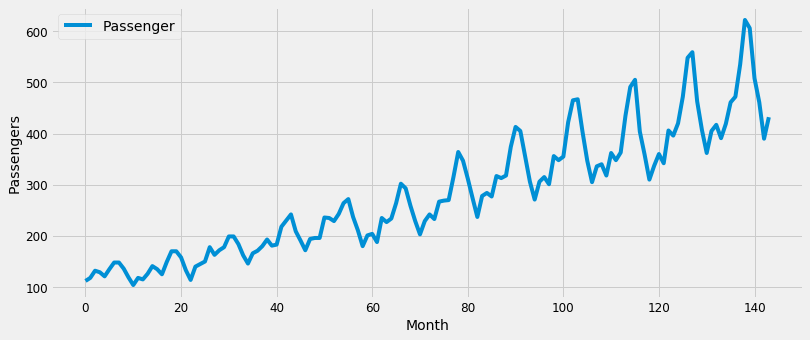

In [49]:
# Plot the time-series
df.plot(figsize=(12,5))
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

#inference: linearly increasing and seasonality in data too

In [50]:
#month column is not readable in the required format, we convert
df['Month']=pd.to_datetime(df['Month'])
df['Month'].head()

#data is now set up for plotting

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
Name: Month, dtype: datetime64[ns]

Multiplicative Trend and seasonality

In [51]:
#Identifying trend in data
passenger=df[['Passenger']]

In [52]:
# Creating training and test data
train=passenger[:120]
test=passenger[120:]
pred=passenger[120:]

In [53]:
#triple Exponential Method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [54]:
#fitting model
model=ExponentialSmoothing(np.asarray(train['Passenger']),trend='mul',
                                          seasonal='mul',seasonal_periods=12).fit(optimized=True)
pred['Holt_Winters']=model.forecast(len(test))

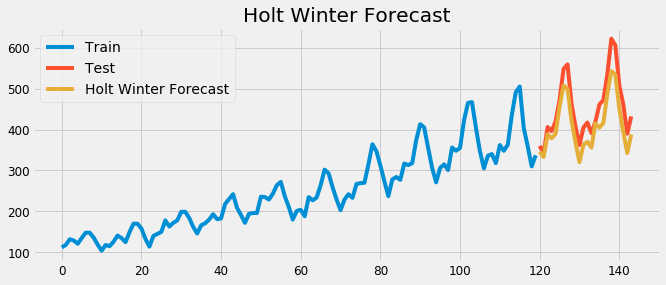

In [55]:
#Plotting
plt.figure(figsize=(10,4))
plt.plot(train.index, train['Passenger'],label='Train')
plt.plot(test.index, test['Passenger'],label='Test')
plt.plot(pred.index, pred['Holt_Winters'], label='Holt Winter Forecast')
plt.legend(loc='best')
plt.title('Holt Winter Forecast')
plt.show()


In [56]:
print(model.params)
#initial season have 12 values for all months

{'smoothing_level': 0.8421052631578947, 'smoothing_slope': 0.05263259123491065, 'smoothing_seasonal': 0.15789473684210525, 'damping_slope': nan, 'initial_level': 212.39999797317535, 'initial_slope': 1.0833321757637826, 'initial_seasons': array([0.52622348, 0.50322734, 0.59580613, 0.5964879 , 0.63321569,
       0.71244793, 0.74612249, 0.69731987, 0.59259778, 0.53758145,
       0.46778401, 0.53023874]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [57]:
# Computing the Root Mean square Error (RMSE)

holt_winter_rmse = sqrt(mean_squared_error(test.Passenger,pred.Holt_Winters))
print("RMSE using Holt Winter Forecasting : ",holt_winter_rmse)

RMSE using Holt Winter Forecasting :  45.25177192412798


In [58]:
# if trend and seasonality is null...SES
# if trend but no seasonality....HOLT


### HOLT on MB

In [18]:
# read the data files
df=pd.read_csv("C:/Users/Preeti Singla/Downloads/Great lakes/drive-download-20181223T124334Z-001/8. Time Series/mb.csv",
               index_col=0)
df.head()

,Sales
Quarters,
1,10
2,31
3,43
4,16
5,11


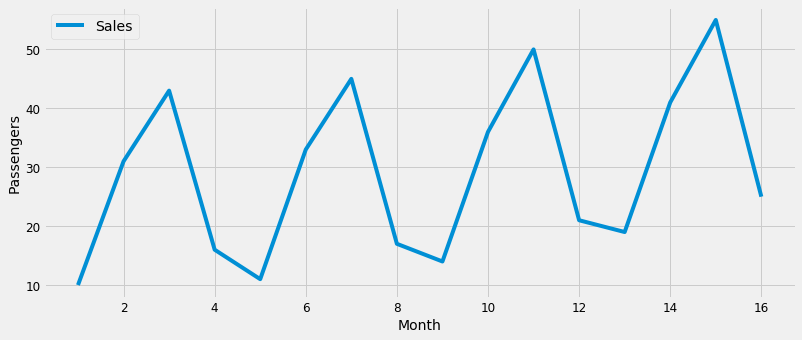

In [19]:
# Plot the time-series
df.plot(figsize=(12,5))
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.show()

#inference: linearly increasing and seasonality in data too

In [23]:
# Creating training and test data
train=df[:12]
test=df[12:]
pred=df[12:]

### HOLT on Drinks

# do it.....